In [26]:
from matplotlib import pyplot as plt
import numpy as np

In [221]:
x = range(0, 1000)
y = range(0, 10)
y1 = [x_**2 for x_ in x]
y2 = [x_**3 for x_ in x]

<ipython-input-253-df986bda986f>:6: RuntimeWarning: divide by zero encountered in log
  line = [np.log(x_) for x_ in x]


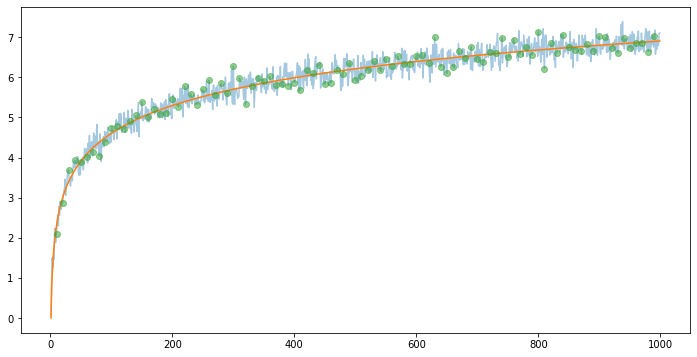

In [253]:
fig, ax = plt.subplots(figsize=(12,6))
# ax.plot(x, y1)
# ax.plot(x, y2)
sigma = 0.2
dist = np.random.default_rng().normal(0.0, sigma, len(x))
line = [np.log(x_) for x_ in x]
with_noise = line + dist
ax.plot(x, with_noise, alpha=0.4)
ax.plot(x, line)
ax.plot([x_ for (i, x_) in enumerate(x) if i % 10 == 0], [y_ for (i, y_) in enumerate(with_noise) if i % 10 == 0], 'o', alpha=0.5)
plt.show()
# ax.plot(x, [])
# ax.fill_between(x, y1, y2, alpha=0.2, color='w')

In [27]:
def gradient_image(ax, extent, direction=0.3, cmap_range=(0, 1), **kwargs):
    """
    Draw a gradient image based on a colormap.

    Parameters
    ----------
    ax : Axes
        The axes to draw on.
    extent
        The extent of the image as (xmin, xmax, ymin, ymax).
        By default, this is in Axes coordinates but may be
        changed using the *transform* kwarg.
    direction : float
        The direction of the gradient. This is a number in
        range 0 (=vertical) to 1 (=horizontal).
    cmap_range : float, float
        The fraction (cmin, cmax) of the colormap that should be
        used for the gradient, where the complete colormap is (0, 1).
    **kwargs
        Other parameters are passed on to `.Axes.imshow()`.
        In particular useful is *cmap*.
    """
    phi = direction * np.pi / 2
    v = np.array([np.cos(phi), np.sin(phi)])
    X = np.array([[v @ [1, 0], v @ [1, 1]],
                  [v @ [0, 0], v @ [0, 1]]])
    a, b = cmap_range
    X = a + (b - a) / X.max() * X
    im = ax.imshow(X, extent=extent, interpolation='bicubic',
                   vmin=0, vmax=1, **kwargs)
    return im

In [28]:
def gradient_bar(ax, x, y, width=0.5, bottom=0):
    for left, top in zip(x, y):
        right = left + width
        gradient_image(ax, extent=(left, right, bottom, top),
                       cmap=plt.cm.Blues_r, cmap_range=(0, 0.8))

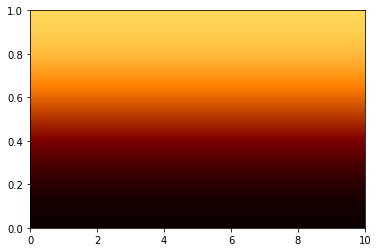

In [40]:
xmin, xmax = xlim = 0, 10
ymin, ymax = ylim = 0, 1

fig, ax = plt.subplots()
ax.set(xlim=xlim, ylim=ylim, autoscale_on=False)

# background image
gradient_image(ax, direction=0, extent=(0, 1, 0, 1),
               transform=ax.transAxes,
               cmap=plt.cm.afmhot,
               cmap_range=(0.0, 0.7))

# N = 10
# x = np.arange(N) + 0.15
# y = np.random.rand(N)
# gradient_bar(ax, x, y, width=0.7)
ax.set_aspect('auto')

In [61]:
direction = 0.3
phi = direction * np.pi / 2
v = np.array([np.cos(phi), np.sin(phi)])
X = np.array([[v @ [1, 0], v @ [1, 1]],
                [v @ [0, 0], v @ [0, 1]]])
print(X)
X = a + (b - a) / X.max() * X
X

[[0.89100652 1.34499702]
 [0.         0.4539905 ]]


array([[0.59747591, 0.8       ],
       [0.2       , 0.40252409]])

<ipython-input-236-d69a1fc5c6c3>:2: RuntimeWarning: divide by zero encountered in log
  return np.abs(y - np.log(x))


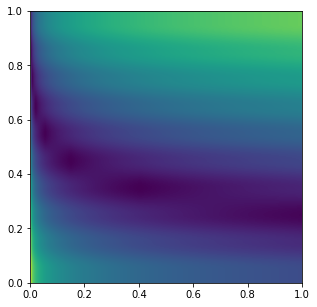

In [236]:
def color_at_coord(x, y):
    return np.abs(y - np.log(x))

X = np.array([[0.1] + [color_at_coord(i, j) for i in range(1000)] for j in range(10)])

# print(X)

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(X, extent=(0, 1, 0, 1))#, interpolation='bicubic', cmap=plt.cm.Blues)
plt.show()
# ax.set_aspect('auto')

In [257]:
[k for k in range(1, 10)]

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [540]:
def dithering_curve(axs=None, sigma=0.7, N=1000, n_points=None, points_sampling_rate=0.1):
    if axs is None:
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    ax, ax2 = axs

    x = [i for i in range(N)]
    dist = np.random.default_rng().normal(0.0, sigma, len(x))

    line = [np.log(x_ + 1) for x_ in x]
    with_noise = line + dist
    step = 1 / points_sampling_rate if not n_points else N / min(n_points, N)
    points_x = [x_ for (i, x_) in enumerate(x) if i % step == 0]
    sampled_line = np.array([y_ for (i, y_) in enumerate(line) if i % step == 0])
    points = np.array([y_ for (i, y_) in enumerate(with_noise) if i % step == 0])
    over_points, under_points = ([], []), ([], [])
    for k, s, p in zip(points_x, sampled_line, points):
        which = over_points if p > s else under_points
        which[0].append(k)
        which[1].append(p)

    ax.plot(x, line)
    # ax.plot(x, with_noise, alpha=0.4)
    # ax.plot(points_x, points, 'o', alpha=0.5)
    ax.plot(over_points[0], over_points[1], 'ro', alpha=0.5)
    ax.plot(under_points[0], under_points[1], 'go', alpha=0.5)
    # ax.errorbar(points_x, points, yerr=points-sampled_line)
    ax.grid(axis='x')

    ranked = sorted(list(enumerate(with_noise)), key=lambda t: t[1])
    ranked, _ = zip(*ranked)
    diffs = np.array(range(len(ranked))) - np.array(ranked)
    
    ax2.plot(range(len(ranked)), range(len(ranked)), color='lightcoral', linewidth=1, linestyle=':')
    ax2.plot(ranked, range(len(ranked)), 'bo', markersize=3)
    ax2.bar(ranked, diffs, bottom=ranked, width=min(0.8, N / 100), color=np.where(diffs >= 0, 'r', 'g'))
    ax2.set_aspect('equal')
    ax2.set_yticks(np.arange(0, N+1, 1), minor=True)
    ax2.grid(axis='y', which='both', alpha=0.3)
    
    ax.title.set_text(f'Dithering for sigma={sigma}')
    ax2.title.set_text(f'New rankings for sigma={sigma}')

In [ ]:
# plt.rc('axes', titlesize)
# TODO: change sizes?

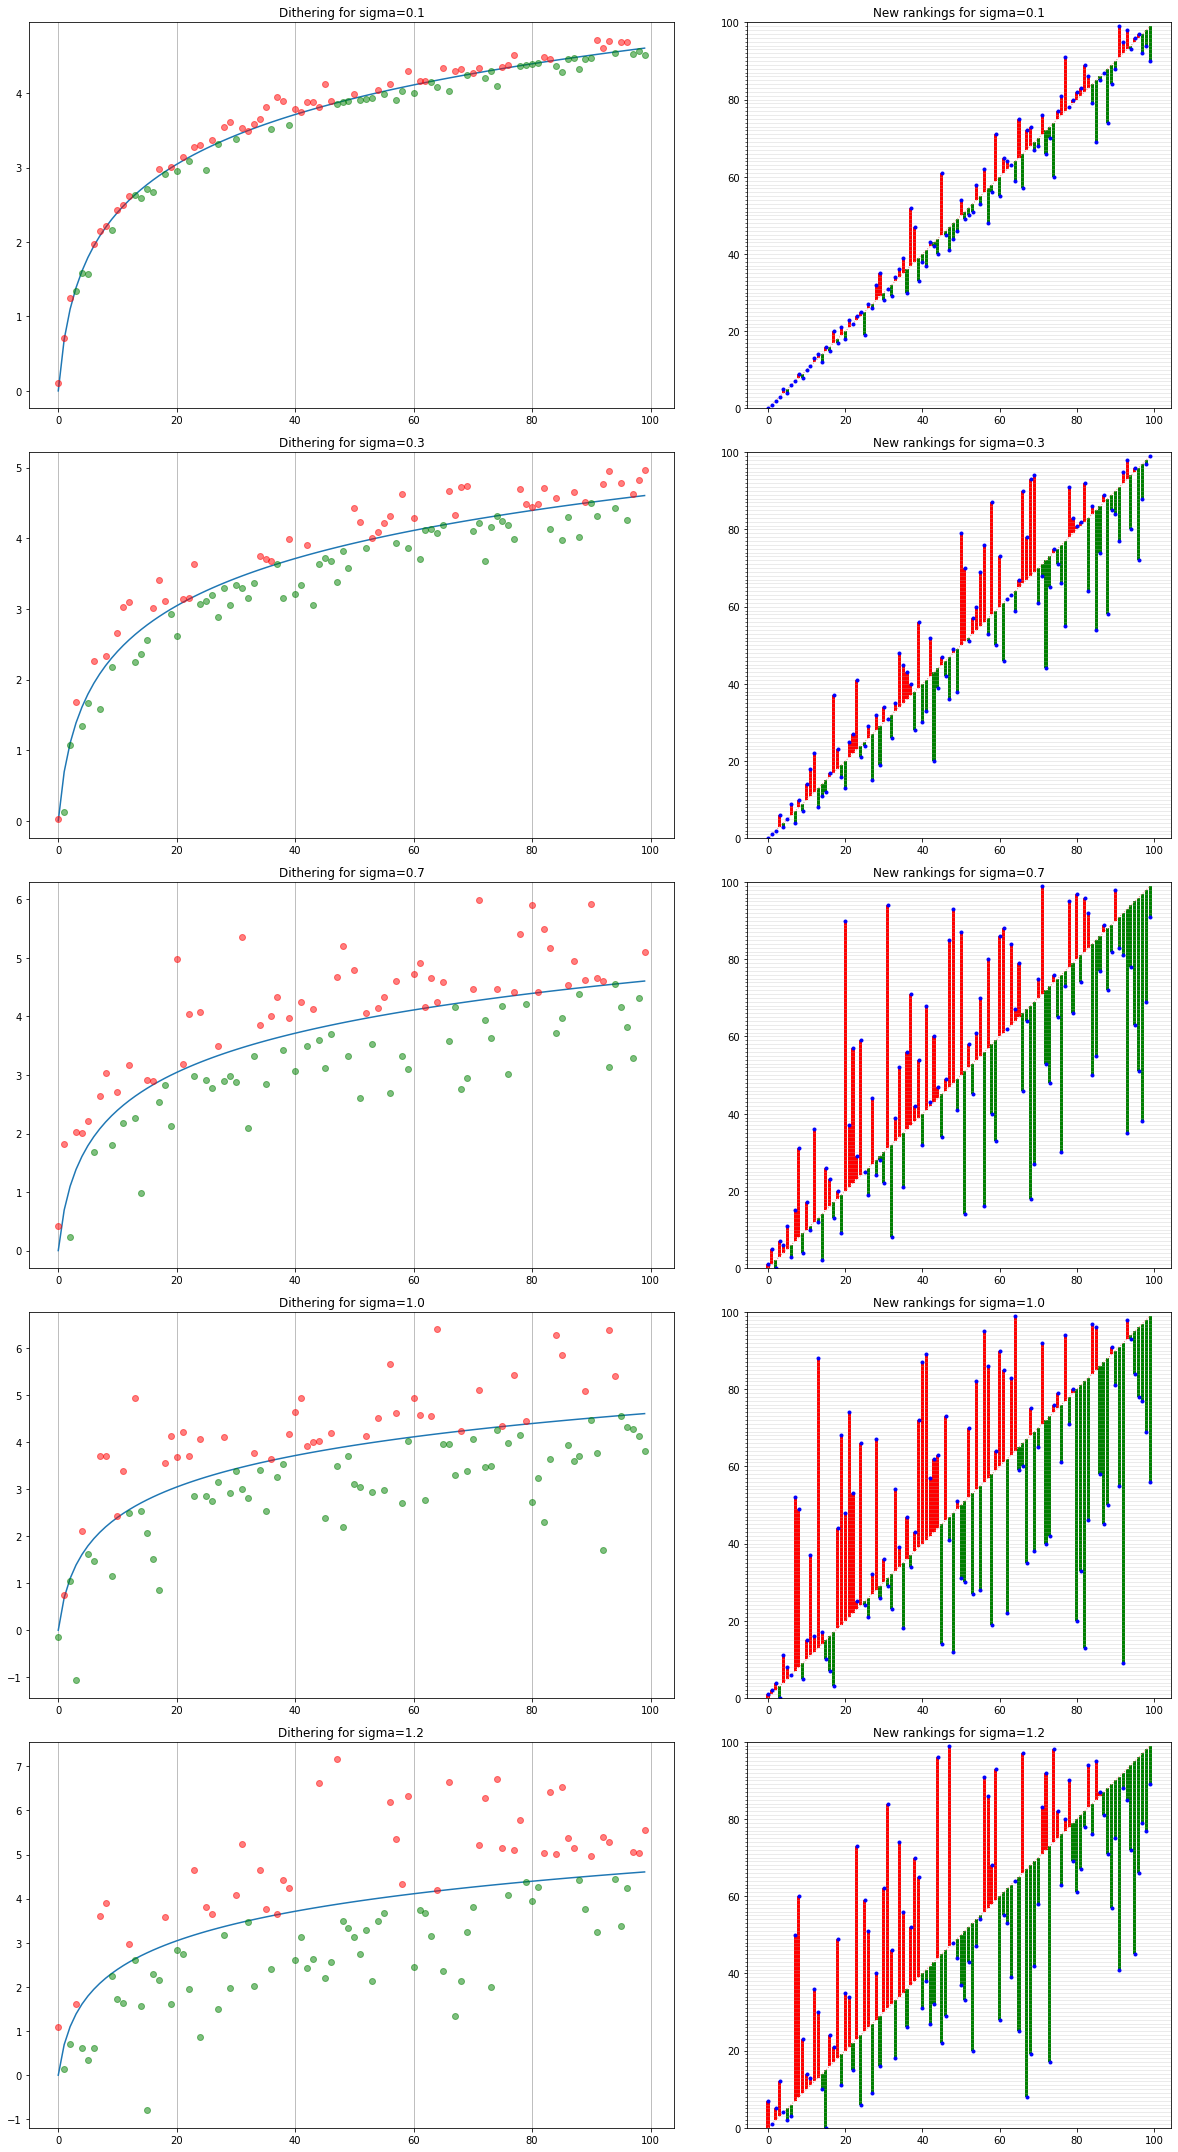

In [541]:
N_ROWS = 5
sigmas = [0.1, 0.3, 0.7, 1.0, 1.2]
fig, axs = plt.subplots(nrows=N_ROWS, ncols=2, figsize=(18, 6 * N_ROWS))

for i in range(N_ROWS):
    dithering_curve(axs=axs[i], sigma=sigmas[i], points_sampling_rate=1.0, N=100)

fig.tight_layout()

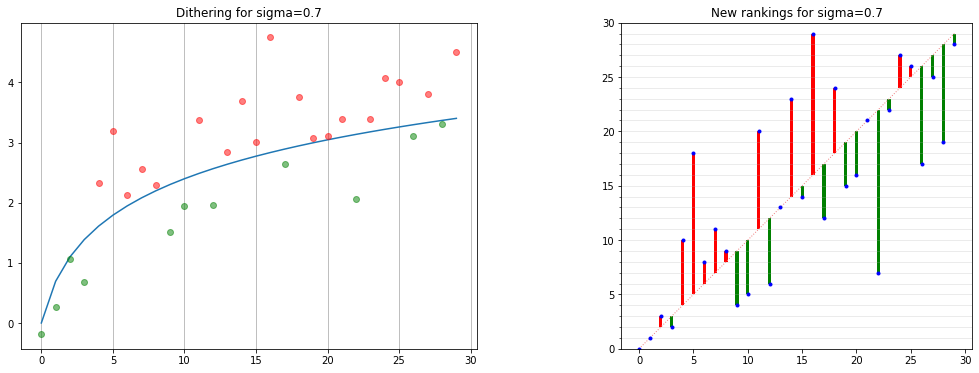

In [542]:
dithering_curve(axs=None, sigma=0.7, points_sampling_rate=1, N=30)